In [1]:
import pandas as pd
import numpy as np
import pickle

from collections import defaultdict

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import re
import enchant
from textblob import TextBlob
import langdetect

import nltk
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

# Loading review data

In [3]:
df_reviews = pd.read_csv("/Users/xupingwang/Desktop/project_5/airbnb/reviews.csv")
# df_reviews_2 = pd.read_csv("/Users/xupingwang/Desktop/project_5/airbnb/reviews-2.csv")

print("total reviewed listings: {}\naverage comments per listing: {}".format( df_reviews.listing_id.nunique(), df_reviews.id.nunique() / df_reviews.listing_id.nunique() ) )
df_reviews.sample(5, random_state=42)

total reviewed listings: 7383
average comments per listing: 44.84694568603549


,listing_id,id,date,reviewer_id,reviewer_name,comments
84163,8053625,202503865,2017-10-11,97438320,Pam,Kandy was great and very helpful with some con...
92579,8743145,187256747,2017-08-26,43112601,Maria,"The host, Josh, was super accommodating and re..."
46953,4067870,148429326,2017-04-30,14544593,Carey,Casa Corazon tops the charts in more ways than...
228632,20796390,199265475,2017-10-01,63951550,Sara,"Wow, the place was everything I hoped for and ..."
69026,6732036,470767972,2019-06-16,178848520,Jessica,Amazing art and decor. Beautiful rooftop was a...


# Minor text cleaning

In [4]:
corpus = list(df_reviews.comments)
review_id = list(df_reviews.id)

# clean \n, \r in the text
corpus = [str(x).replace("\n", " ").replace("\r", " ") for x in corpus]

# Language detection and sentiment analysis

In [5]:
# # sentiment_score list item in the format: [review_id, review content, language, sentiment, objectivity]
# # takes a long time to run the block, do not re-run

# sentiment_score = []

# for i, j in enumerate(corpus):
#     try:
#         lan = str(langdetect.detect_langs(j))[1:3]
#     except:
#         lan = "NA"
#     sentiment_score.append( [review_id[i], j, lan] + list(TextBlob(j).sentiment) )
#     if i % 2000 == 0:
#         print("+", end="")

## pickle and unpickle

In [6]:
# with open("user_sentiment.pkl", "wb") as f:
#     pickle.dump(sentiment_score, f)

with open("user_sentiment.pkl", "rb") as f:
    sentiment_score = pickle.load(f)

# Non-English post sentiment cleanup

In [7]:
count_ = 0
for i in sentiment_score:
    if i[2] != "en":
        i[3] = 0.0

In [8]:
# # language count in the review, make sure the majority is in english

# from collections import defaultdict
# country = defaultdict(int)
# for i in sentiment_score:
#     country[i[2]] += 1  
# country

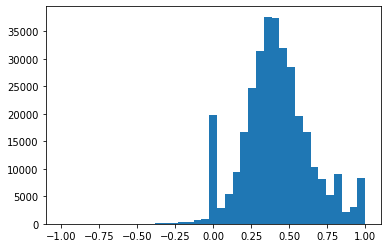

In [9]:
g = plt.hist([x[3] for x in sentiment_score] , bins=39)

# Very little negative reviews, low rating houses maybe hard to survive in the market. 
# A lot of zeros due to in foreign languages, should consider google sentiment api for better results if time allows.

In [10]:
# # checking negative reviews

# for i in sorted(sentiment_score, key=(lambda x : x[3])):
#     if i[3]<0:
#         print(i)

# Listing mean sentiment

In [11]:
# # combine into one line below to save memory

# df_sentiment = pd.DataFrame(sentiment_score, columns = ["id", "review", "language", "sentiment", "objectivity"])
# df_reviews = df_reviews.merge(df_sentiment, left_on='id', right_on='id')
# df_user_sentiment = df_reviews[["listing_id", "sentiment" ]].groupby("listing_id", as_index=False).sentiment.mean()

df_mean_user_sentiment = df_reviews.merge(\
pd.DataFrame(sentiment_score, columns = ["id", "review", "language", "sentiment", "objectivity"])\
, left_on='id', right_on='id')\
[["listing_id", "sentiment" ]].groupby("listing_id", as_index=False).sentiment.mean()

## Output mean_user_sentiment

In [12]:
# with open("mean_user_sentiment.pkl", "wb") as f:
#     pickle.dump(df_mean_user_sentiment, f)

# with open("mean_user_sentiment.pkl", "rb") as f:
#     df_mean_user_sentiment = pickle.load(f)

In [1]:
# sorted(sentiment_score, key=(lambda x: x[3]))